### Azure AI Video Indexer
- In this exercise, we use the Azure Video Analyzer portal / SDK to perform
    - Face identifications and analysis, identify the faces detected in the video.
    - Count the total distinct faces that are collected in the video.
    - Collect emotion and sentiment from the video.
    - Collect different brands and logos identified in the video.
    - Add a custom person model to the portal. Use this custom person model to check if this person's face is identified in the video.

##### Imports

In [1]:
import io
import datetime
import pandas as pd
from PIL import Image
import requests
import io
import glob, os, sys, time, uuid

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw

from video_indexer import VideoIndexer
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from msrest.authentication import CognitiveServicesCredentials

### Documentation
- https://docs.microsoft.com/en-us/azure/azure-video-analyzer/video-analyzer-for-media-docs/video-indexer-use-apis

### Set up the Video Analyzer Portal Login:
- https://www.videoindexer.ai/account
- https://www.videoindexer.ai/media/library  - All uploaded video

### Get API Subscription:
https://api-portal.videoindexer.ai/

### Article
- https://medium.com/microsoftazure/visual-brand-detection-with-azure-video-indexer-cd65330b908c

In [2]:
# Todo: add resources
CONFIG = {
    'SUBSCRIPTION_KEY': '------------------------------',
    'LOCATION': '-----',
    'ACCOUNT_ID': '-----------------------------------'
}

video_analysis = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

In [3]:
video_analysis.check_access_token()

Getting video indexer access token...
Access Token: eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiJlMzEzZDcxYmJmYTM0YzQyYjM2NDg5ZWM3NDczMTNmMSIsIkFjY291bnRJZCI6Ijc2ZDQzZTU1LTA3MmItNDFkNS1hYTFjLTZmNTI5ZWJmYzk0NiIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IjU4Mjk3MDk0MDdGRDQxMTRBNTQ2RkQ0NDFGOTk0RUI1IiwiVXNlclR5cGUiOiJNaWNyb3NvZnRDb3JwQWFkIiwiSXNzdWVyTG9jYXRpb24iOiJUcmlhbCIsIm5iZiI6MTY5MzY4NDQ2NiwiZXhwIjoxNjkzNjg4MzY2LCJpc3MiOiJodHRwczovL2FwaS52aWRlb2luZGV4ZXIuYWkvIiwiYXVkIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyJ9.lw4CwFPpaoVYd2AjXPchp9u5DgUxSyy7SPlZ-C_xProsy0m9a1q01CgqIVOPlpPtTRd5dqKSYq-RK0a2EQ2XIBYhTkNhqHy03Um3LY5IS6h1MLNJXCmBOt8LeHf3SzaN_TnXr6_aLpt5XJ7-oMybARycjdUeDzvZ4Q5pHlta5iTcjYOHAlwrTW_yxwq05bULqXwwpIbYBaSygshU0WuA-EHJcqEmUctKeWaq0_JFCtU5sIrUwNK1yC8AWPcTZ8KrdMAeHmPNynQxcwpJZJLMpM-2XPKIBWu_E57ZqB77GSb03dRG6X4N32Kv4peqy2tC5ecmQR_AzDVg7NAcaURWVw


##### Uploading a video from local disk to Video Analyzer portal
- The video to analyze is a Microsoft Research video [Azure and The Turing Institute Use Online Data to Better Understand Human Behavior]
 https://www.youtube.com/watch?v=bQHkfzYaabo
- The video was downloaded from YouTube streaming service to loacal disk, rather than a blob on an Azure storage account, and uploaded using the SDK code rather than than using portal directly.

In [4]:
notebook_path = os.path.abspath("Azure-AI-Video-Indexer_projet.ipynb")
video_file_name = os.path.join(os.path.dirname(notebook_path), "Azure-and-The-Turing-Institute-Use-Online-Data-to-Better-Understand-Human-Behavior.mp4")

uploaded_video_id = video_analysis.upload_to_video_indexer(
    input_filename=video_file_name,
    video_name='mohamed-ghazal-demo-video',
    video_language='English')

Uploading video to video indexer...


In [5]:
uploaded_video_id

'4266032723'

In [6]:
info = video_analysis.get_video_info(uploaded_video_id, video_language='English')

Getting video info for: 4266032723
Video still processing, current status: 18%


In [7]:
info

{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processing',
 'accountId': '76d43e55-072b-41d5-aa1c-6f529ebfc946',
 'id': '4266032723',
 'name': 'mohamed-ghazal-demo-video',
 'userName': 'Mohamed 9601413',
 'created': '2023-09-02T20:00:29.7566667+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 89,
 'duration': '0:01:29.83975',
 'summarizedInsights': {'name': 'mohamed-ghazal-demo-video',
  'id': '4266032723',
  'privacyMode': 'Private',
  'duration': {'time': '0:01:29.83975', 'seconds': 89.8},
  'thumbnailVideoId': '4266032723',
  'thumbnailId': '62f8aefa-a45e-4b91-8385-6633a7e00404',
  'faces': [],
  'keywords': [],
  'sentiments': [],
  'emotions': [],
  'audioEffects': [],
  'labels': [],
  'framePatterns': [],
  'brands': [],
  'namedLocations': [],
  'namedPeople': [],
  'statistics': {'correspondenceCount': 0,
   'speakerTalkToListenRatio': {},
   'speakerLongestMonolog': {},
   'speakerNumberOfFragments': {},
 

##### Processing RAW Json

In [8]:
# Todo: add the video ID of your uploaded video
video_id = uploaded_video_id

In [9]:
# Get the raw Json info
video_analysis.get_video_info(video_id)
info = video_analysis.get_video_info(video_id, video_language='English')

Getting video info for: 4266032723
Getting video info for: 4266032723


In [10]:
if len(info['videos'][0]['insights']['faces'][0]['thumbnails']):
    print("We found {} faces in this video.".format(str(len(info['videos'][0]['insights']['faces'][0]['thumbnails']))))

We found 16 faces in this video.


##### Extract And Save The Face-Specific Thumbnails 

In [11]:
# Todo: get Thumbnail ID from the Analysis JSON 
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        # Todo: get the image code for the thumbnail ID 
        # using the video_analysis.get_thumbnail_from_video_indexer object
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id= video_id, thumbnail_id= thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: 4266032723, thumbnail: 9b23f821-c95c-434d-a97f-989756840cb8
Getting thumbnail from video: 4266032723, thumbnail: c27b028b-7b36-4200-aaa6-84b427c2658d
Getting thumbnail from video: 4266032723, thumbnail: c59c3285-82a1-44ed-a04c-c7e6d02592d7
Getting thumbnail from video: 4266032723, thumbnail: 9a7f6b42-1841-4807-bd7e-a442af6cb198
Getting thumbnail from video: 4266032723, thumbnail: d037f255-4859-4dda-abe8-a1f37964d234
Getting thumbnail from video: 4266032723, thumbnail: 832efc95-888c-448d-afde-6195070301ff
Getting thumbnail from video: 4266032723, thumbnail: 693dcc8d-aa03-47ab-9dcd-a407b449ef85
Getting thumbnail from video: 4266032723, thumbnail: 375ac7ec-74e4-41f7-a885-b83679b26613
Getting thumbnail from video: 4266032723, thumbnail: e5c2b11f-64fa-4c11-bf15-edf051cc5e22
Getting thumbnail from video: 4266032723, thumbnail: f8f5791c-7816-4e60-a4ea-42eadcc78110
Getting thumbnail from video: 4266032723, thumbnail: 9d47f746-1dae-42d6-bc11-9294e0b55574
Getting th

{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}


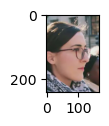

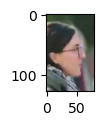

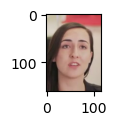

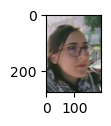

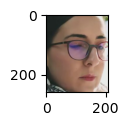

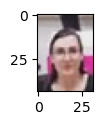

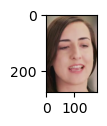

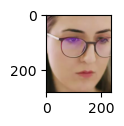

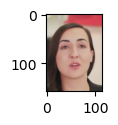

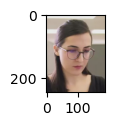

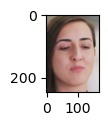

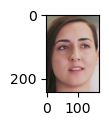

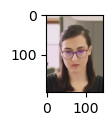

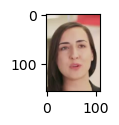

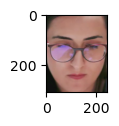

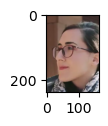

In [12]:
# Plot the images
for img in images:
    print(img.info)
    plt.figure(figsize=(2, 1))
    plt.imshow(img)

In [13]:
# Save the images
i = 1
for img in images:
    print(type(img))
    img.save('video-analyzer-face' + str(i) + '.jpg')
    i= i+ 1

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [14]:
# Verify the download process 
!ls video-analyzer-face*.jpg

video-analyzer-face10.jpg  video-analyzer-face16.jpg  video-analyzer-face6.jpg
video-analyzer-face11.jpg  video-analyzer-face1.jpg   video-analyzer-face7.jpg
video-analyzer-face12.jpg  video-analyzer-face2.jpg   video-analyzer-face8.jpg
video-analyzer-face13.jpg  video-analyzer-face3.jpg   video-analyzer-face9.jpg
video-analyzer-face14.jpg  video-analyzer-face4.jpg
video-analyzer-face15.jpg  video-analyzer-face5.jpg


##### View And Convert Thumbnail To Visible Image

In [15]:
info['videos'][0]['insights']['faces'][0]['thumbnails']

[{'id': '9b23f821-c95c-434d-a97f-989756840cb8',
  'fileName': 'FaceInstanceThumbnail_9b23f821-c95c-434d-a97f-989756840cb8.jpg',
  'instances': [{'adjustedStart': '0:00:00',
    'adjustedEnd': '0:00:00.0417083',
    'start': '0:00:00',
    'end': '0:00:00.0417083'}]},
 {'id': 'c27b028b-7b36-4200-aaa6-84b427c2658d',
  'fileName': 'FaceInstanceThumbnail_c27b028b-7b36-4200-aaa6-84b427c2658d.jpg',
  'instances': [{'adjustedStart': '0:00:05.0467083',
    'adjustedEnd': '0:00:05.0884166',
    'start': '0:00:05.0467083',
    'end': '0:00:05.0884166'}]},
 {'id': 'c59c3285-82a1-44ed-a04c-c7e6d02592d7',
  'fileName': 'FaceInstanceThumbnail_c59c3285-82a1-44ed-a04c-c7e6d02592d7.jpg',
  'instances': [{'adjustedStart': '0:00:10.0934166',
    'adjustedEnd': '0:00:10.1351249',
    'start': '0:00:10.0934166',
    'end': '0:00:10.1351249'}]},
 {'id': '9a7f6b42-1841-4807-bd7e-a442af6cb198',
  'fileName': 'FaceInstanceThumbnail_9a7f6b42-1841-4807-bd7e-a442af6cb198.jpg',
  'instances': [{'adjustedStart': '0

In [18]:
# Todo: enter one of the thumbnail output you got from the previous cell
thumbnail_id='f0c1b047-4d2f-4316-8452-95c099615d2f'

Getting thumbnail from video: 4266032723, thumbnail: f0c1b047-4d2f-4316-8452-95c099615d2f


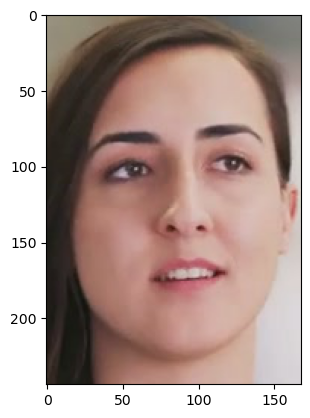

In [19]:
# Todo: convert encoded image to visible image 
# using the video_analysis.get_thumbnail_from_video_indexer object
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id= video_id, thumbnail_id= thumbnail_id)
img_stream = io.BytesIO(img_code)
img = Image.open(img_stream)
imshow(img)

##### Getting thumbnails using Keyframes

In [ ]:
"""
keyframes = []
for shot in info["videos"][0]["insights"]["shots"]:
    for keyframe in shot["keyFrames"]:
        keyframes.append(keyframe["instances"][0]['thumbnailId'])
"""

In [ ]:
"""
for keyframe in keyframes:
    img_str = video_analysis.get_thumbnail_from_video_indexer(video_id,  keyframe)
"""

##### Emotion from the Video Analyzer

In [20]:
info['summarizedInsights']['sentiments']

[{'sentimentKey': 'Neutral',
  'seenDurationRatio': 0.9996,
  'appearances': [{'startTime': '0:00:00',
    'endTime': '0:01:29.83975',
    'startSeconds': 0,
    'endSeconds': 89.8}]}]

In [21]:
info['summarizedInsights']['emotions']

[]

##### Collecting Faces From Video Analyzer

In [22]:
# Todo: add resources
FACE_SERV_KEY = "1d4f70d496eb4e40aef496987ea87202"
FACE_SERV_ENDPOINT = "https://faceservicefacialrecog.cognitiveservices.azure.com/"

# Create a client
face_client = FaceClient(FACE_SERV_ENDPOINT, CognitiveServicesCredentials(FACE_SERV_KEY))
face_client.api_version

'1.0'

### Build the Person Model Using Person Images 
**Note: here you need to build a person model using the person images. Before moving forward, make sure you upload all the images to the workspace.**


In [23]:
!ls dr-merve-alanyali-face*.jpg

dr-merve-alanyali-face-1.jpg  dr-merve-alanyali-face-3.jpg
dr-merve-alanyali-face-2.jpg  dr-merve-alanyali-face-5.jpg


In [24]:
my_face_images = [file for file in glob.glob('*.jpg') if file.startswith("dr-merve-alanyali-face")]
print(my_face_images)

['dr-merve-alanyali-face-5.jpg', 'dr-merve-alanyali-face-2.jpg', 'dr-merve-alanyali-face-1.jpg', 'dr-merve-alanyali-face-3.jpg']


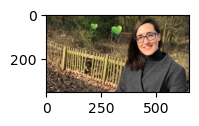

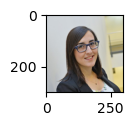

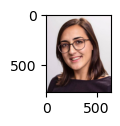

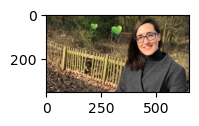

In [25]:
for img in my_face_images:
    with open(img, 'rb') as img_code:
        img_view_ready = Image.open(img_code)
        plt.figure(figsize=(2, 1))
        plt.imshow(img_view_ready)

In [26]:
# Note if this UUID already used earlier, you will get an error 
# Replace "person-avkash" with your own PersonModel name
PERSON_GROUP_ID = str(uuid.uuid4())
person_group_name = 'dr-merve-alanyali'

In [27]:
## This code is taken from Azure face SDK 
## ---------------------------------------
def build_person_group(client, person_group_id, pgp_name):
    print('Create and build a person group...')
    # Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
    print('Person group ID:', person_group_id)
    client.person_group.create(person_group_id = person_group_id, name=person_group_id)

    # Create a person group person.
    my_face = client.person_group_person.create(person_group_id, pgp_name)
    # Find all jpeg images of human in working directory.
    my_face_images = [file for file in glob.glob('*.jpg') if file.startswith("dr-merve-alanyali-face")]
    # Add images to a Person object
    for image_p in my_face_images:
        with open(image_p, 'rb') as w:
            client.person_group_person.add_face_from_stream(person_group_id, my_face.person_id, w)

    # Train the person group, after a Person object with many images were added to it.
    client.person_group.train(person_group_id)

    # Wait for training to finish.
    while (True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)

In [28]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name)

Create and build a person group...
Person group ID: 2f744506-64e7-4156-b85e-cdd700cccb43
Training status: succeeded.


In [29]:
# Detect all faces in query image list, then add their face IDs to a new list.
def detect_faces(client, query_images_list):
    print('Detecting faces in query images list...')

    face_ids = {} # Keep track of the image ID and the related image in a dictionary
    for image_name in query_images_list:
        image = open(image_name, 'rb') # BufferedReader
        print("Opening image: ", image.name)
        time.sleep(5)

        # Detect the faces in the query images list one at a time, returns list[DetectedFace]
        faces = client.face.detect_with_stream(image)  

        # Add all detected face IDs to a list
        for face in faces:
            print('Face ID', face.face_id, 'found in image', os.path.splitext(image.name)[0]+'.jpg')
            # Add the ID to a dictionary with image name as a key.
            # This assumes there is only one face per image (since you can't have duplicate keys)
            face_ids[image.name] = face.face_id

    return face_ids

In [30]:
ids = detect_faces(face_client, my_face_images)

Detecting faces in query images list...
Opening image:  dr-merve-alanyali-face-5.jpg
Face ID 672a7560-3448-426a-a60a-bbd40def77eb found in image dr-merve-alanyali-face-5.jpg
Opening image:  dr-merve-alanyali-face-2.jpg
Face ID 5b697afc-ff49-4363-8531-7e7feac9f41d found in image dr-merve-alanyali-face-2.jpg
Opening image:  dr-merve-alanyali-face-1.jpg
Face ID 5a156bb6-519c-48b0-8893-b7e4692ef568 found in image dr-merve-alanyali-face-1.jpg
Opening image:  dr-merve-alanyali-face-3.jpg
Face ID b02ea206-ecb7-41ae-bb53-a25ca2b6aaa2 found in image dr-merve-alanyali-face-3.jpg


In [31]:
ids

{'dr-merve-alanyali-face-5.jpg': '672a7560-3448-426a-a60a-bbd40def77eb',
 'dr-merve-alanyali-face-2.jpg': '5b697afc-ff49-4363-8531-7e7feac9f41d',
 'dr-merve-alanyali-face-1.jpg': '5a156bb6-519c-48b0-8893-b7e4692ef568',
 'dr-merve-alanyali-face-3.jpg': 'b02ea206-ecb7-41ae-bb53-a25ca2b6aaa2'}

##### Matching Face From The Person Model With Face From Video Analyzer 

In [34]:
# Todo: choose a image from the Video Analyzer and change the local path to read the image
notebook_path = os.path.abspath("Azure-AI-Video-Indexer_projet.ipynb")
img_file_name = os.path.join(os.path.dirname(notebook_path), "video-analyzer-face10.jpg")
dl_image = open(img_file_name, 'rb')

# Detect faces in that image
dl_faces = face_client.face.detect_with_stream(dl_image)

In [35]:
# View Face ID and then save it into the list of already saved Face IDs
for face in dl_faces:
    print('Face ID', face.face_id, 'found in image', dl_image)
    # Add the ID to a dictionary with image name as a key.
    # This assumes there is only one face per image (since you can't have duplicate keys)
    ids['video-analyzer.jpg'] = face.face_id

Face ID c5602496-e6a9-431f-aefa-36bf4e503bae found in image <_io.BufferedReader name='/home/mohamed-ghazal/git/Azure-AI_Engineer/Computer_Vision/Azure AI Video Indexer/video-analyzer-face10.jpg'>


In [36]:
# Now, you should have n + 1 Face IDs in the list
ids

{'dr-merve-alanyali-face-5.jpg': '672a7560-3448-426a-a60a-bbd40def77eb',
 'dr-merve-alanyali-face-2.jpg': '5b697afc-ff49-4363-8531-7e7feac9f41d',
 'dr-merve-alanyali-face-1.jpg': '5a156bb6-519c-48b0-8893-b7e4692ef568',
 'dr-merve-alanyali-face-3.jpg': 'b02ea206-ecb7-41ae-bb53-a25ca2b6aaa2',
 'video-analyzer.jpg': 'c5602496-e6a9-431f-aefa-36bf4e503bae'}

In [37]:
# Todo: enter the video analyzer face ID of from the output of the cell above
get_the_face_id_from_the_video_analyzer = 'c5602496-e6a9-431f-aefa-36bf4e503bae'

In [38]:
# Identify the face from the video analyzer
person_gp_results = face_client.face.identify([get_the_face_id_from_the_video_analyzer], PERSON_GROUP_ID)

In [39]:
for result in person_gp_results:
    if result.candidates:
        for candidate in result.candidates:
            print("The Identity match confidence is {}".format(candidate.confidence))
    else:
        print("Can't verify the identity with the person group")

The Identity match confidence is 0.68247


### End!